In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("default")
from run_LR import load_dataset
from LR_data_preprocessing import seperate_secondary_structures
import numpy as np
import pickle
import seaborn as sns
import json

## load BMRB IDs

In [3]:
with open("project_big_dataset.txt", "r") as infile:
    big_dataset_bmrb_ids = infile.read().replace("\n","").split(",")

In [4]:
with open("project_test_dataset.txt", "r") as infile:
    test_dataset_bmrb_ids = infile.read().replace("\n","").split(",")

In [5]:
with open("../2006_filtered_by_shifts.txt", "r") as infile:
    small_dataset_bmrb_ids = infile.read().replace("\n","").split(",")

---

## load Secondary Structure

In [6]:
helix_percentage_ = []
sheet_percentage_ = []
coil_percentage_ = []

dataset_size = [3374, 522, 713]

for size in dataset_size:
    X_train, y_train = load_dataset(size)
    helix_percentage, sheet_percentage, coil_percentage = seperate_secondary_structures(y_train)
    
    helix_percentage_.append(sum(np.array(helix_percentage).ravel())/len(helix_percentage)*100)
    sheet_percentage_.append(sum(np.array(sheet_percentage).ravel())/len(sheet_percentage)*100)
    coil_percentage_.append(sum(np.array(coil_percentage).ravel())/len(coil_percentage)*100)

In [7]:
print(helix_percentage_)
print(sheet_percentage_)
print(coil_percentage_)

[31.361588618850007, 31.78160919540231, 31.32819074333804]
[17.380557202133897, 18.063218390804582, 16.920056100981768]
[50.203615886188565, 49.431034482758605, 50.647966339410885]


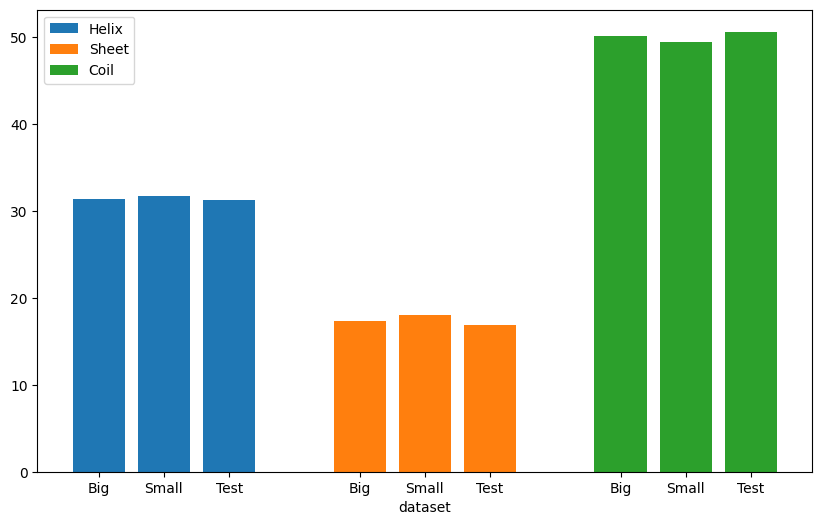

In [9]:
plt.figure(figsize=(10,6))
plt.bar([0,1,2], helix_percentage_, label="Helix")
plt.bar([4,5,6], sheet_percentage_, label="Sheet")
plt.bar([8,9,10], coil_percentage_, label="Coil")
plt.xticks([0,1,2,4,5,6,8,9,10], ["Big", "Small", "Test",
                                  "Big","Small", "Test",
                                  "Big", "Small", "Test"], rotation=0)
plt.xlabel("dataset")
plt.legend()
plt.savefig("../../Drafts/Project-Thesis/img/Sec_struc_bars.png")

## load Chemical Shifts

In [10]:
with open("../chemical_shifts.pkl", "rb") as infile:
        chemical_shifts = pickle.load(infile)

In [11]:
big_dataset_shifts = [chemical_shifts[int(bmrb_id)] for bmrb_id in big_dataset_bmrb_ids]

In [12]:
small_dataset_shifts = [chemical_shifts[int(bmrb_id)] for bmrb_id in small_dataset_bmrb_ids]

In [13]:
test_dataset_shifts = [chemical_shifts[int(bmrb_id)] for bmrb_id in test_dataset_bmrb_ids]

### make figure H-shifts

In [14]:
chemical_shifts_H = [list() for i in range(3)]
for j, dataset in enumerate([big_dataset_shifts, small_dataset_shifts, test_dataset_shifts]):
    for sheet in dataset:
        chemical_shifts_H[j].append(sheet.X_shift.to_numpy())

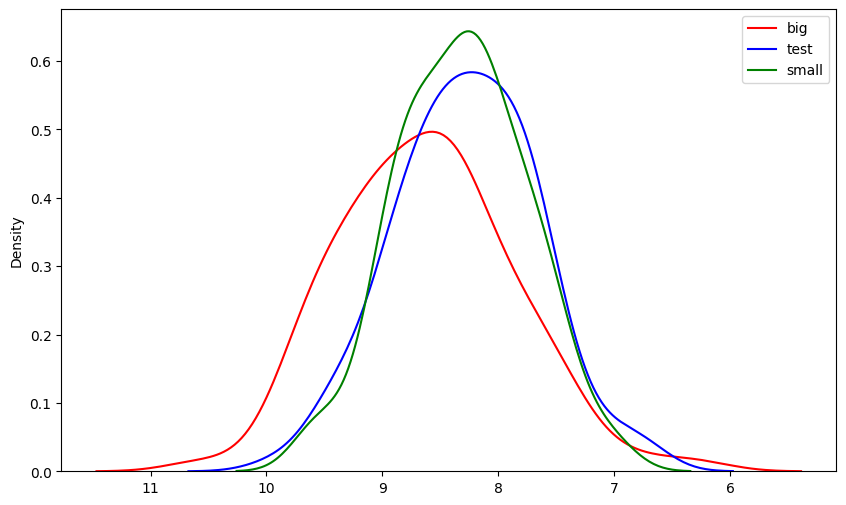

In [69]:
plt.figure(figsize=(10,6))
plt.gca().invert_xaxis()
sns.kdeplot(chemical_shifts_H[0][0].reshape(-1), color="r", label="big", shade=False, bw_method=0.4)
sns.kdeplot(chemical_shifts_H[0][2].reshape(-1), color="b", label="test", shade=False, bw_method=0.4)
sns.kdeplot(chemical_shifts_H[0][1].reshape(-1), color="g", label="small", shade=False, bw_method=0.4)
plt.legend()
plt.savefig("../../Drafts/Project-Thesis/img/H_Shift_Distribution.jpg")

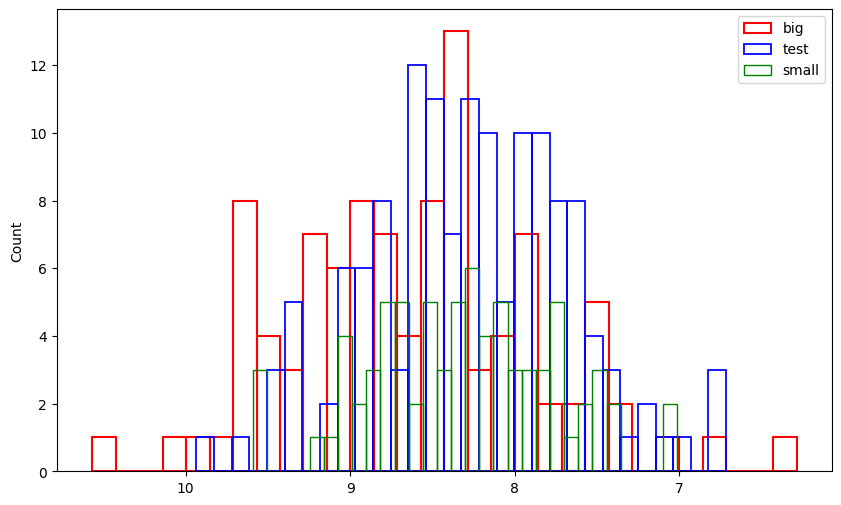

In [57]:
plt.figure(figsize=(10,6))
plt.gca().invert_xaxis()
sns.histplot(chemical_shifts_H[0][0].reshape(-1), color="r", label="big", fill=False, bins=30) #, stat="density")
sns.histplot(chemical_shifts_H[0][2].reshape(-1), color="b", label="test", fill=False, bins=30) #, stat="density")
sns.histplot(chemical_shifts_H[0][1].reshape(-1), color="g", label="small", fill=False, bins=30) #, stat="density")
plt.legend()
#plt.savefig("../../Drafts/Project-Thesis/img/H_Shift_Distribution.png")

### make figure N-shifts

In [16]:
chemical_shifts_N = [list() for i in range(3)]
for j, dataset in enumerate([big_dataset_shifts, small_dataset_shifts, test_dataset_shifts]):
    for sheet in dataset:
        chemical_shifts_N[j].append(sheet.Y_shift.to_numpy())

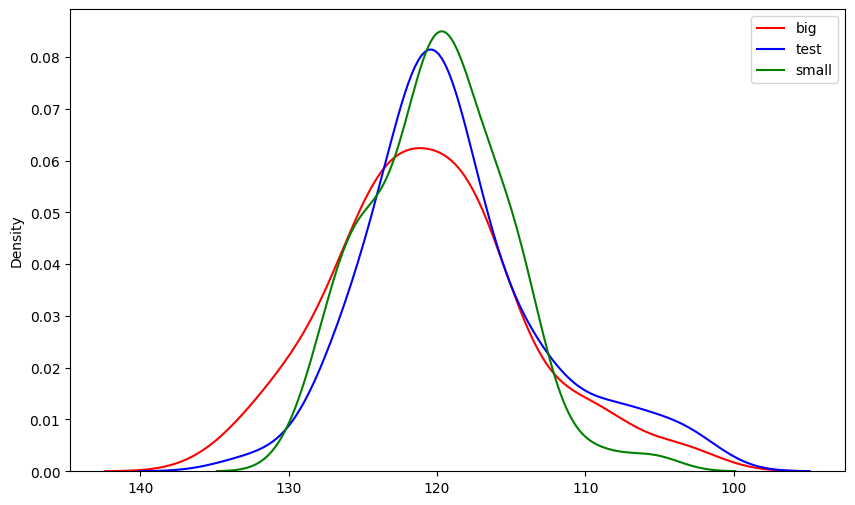

In [68]:
plt.figure(figsize=(10,6))
plt.gca().invert_xaxis()
sns.kdeplot(chemical_shifts_N[0][0].reshape(-1), color="r", label="big", shade=False, bw_method=0.4)
sns.kdeplot(chemical_shifts_N[0][2].reshape(-1), color="b", label="test", shade=False, bw_method=0.4)
sns.kdeplot(chemical_shifts_N[0][1].reshape(-1), color="g", label="small", shade=False, bw_method=0.4)
plt.legend()
plt.savefig("../../Drafts/Project-Thesis/img/N_Shift_Distribution.jpg")

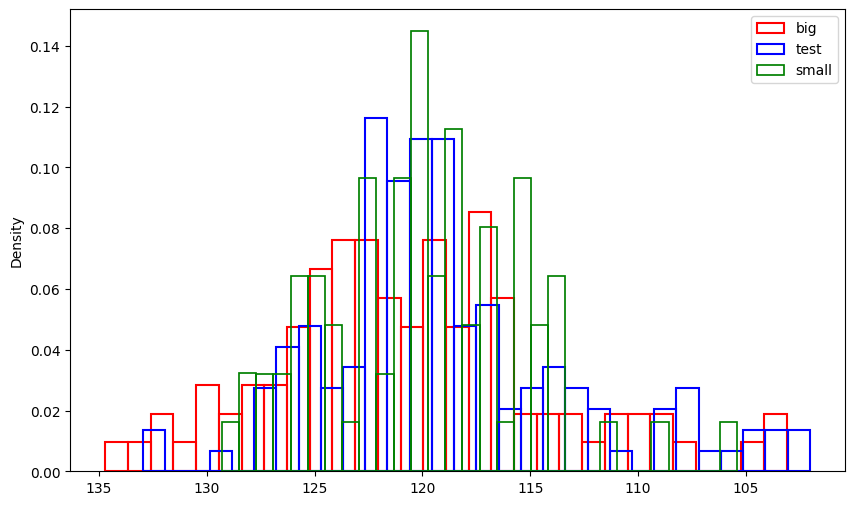

In [63]:
plt.figure(figsize=(10,6))
plt.gca().invert_xaxis()
sns.histplot(chemical_shifts_N[0][0].reshape(-1), color="r", label="big", fill=False, bins=30, stat="density")
sns.histplot(chemical_shifts_N[0][2].reshape(-1), color="b", label="test", fill=False, bins=30, stat="density")
sns.histplot(chemical_shifts_N[0][1].reshape(-1), color="g", label="small", fill=False, bins=30, stat="density")
plt.legend()
#plt.savefig("../../Drafts/Project-Thesis/img/N_Shift_Distribution.png")

## load PH, Temperature

In [18]:
with open("../updated_measurement_conditions.json", "r") as infile:
    updated_measurement_conditions = json.load(infile)

In [19]:
big_dataset_conditions = [updated_measurement_conditions[bmrb_id] for bmrb_id in big_dataset_bmrb_ids]
small_dataset_conditions = [updated_measurement_conditions[bmrb_id] for bmrb_id in small_dataset_bmrb_ids]
test_dataset_conditions = [updated_measurement_conditions[bmrb_id] for bmrb_id in test_dataset_bmrb_ids]

In [20]:
temperatures = [list() for i in range(3)]
pHs = [list() for i in range(3)]

for j, dataset in enumerate([big_dataset_conditions, small_dataset_conditions, test_dataset_conditions]):
    for entry in dataset:
        temperatures[j].append(float(entry["temperature"]))
        try:
            pHs[j].append(float(entry["ph"]))
        except ValueError:
            print(entry["ph"])
            pHs[j].append(5.5)
            

5.5; 5.5
5.5; 5.5
5.5; 5.5


In [21]:
temperatures[0][:10]

[298.0, 303.0, 293.0, 310.0, 298.0, 298.0, 298.0, 298.0, 310.0, 298.0]

In [22]:
big_dataset_conditions[0]

{'ionic strength': '0.2', 'ph': '6.5', 'pressure': '1', 'temperature': '298'}

### temperature plot

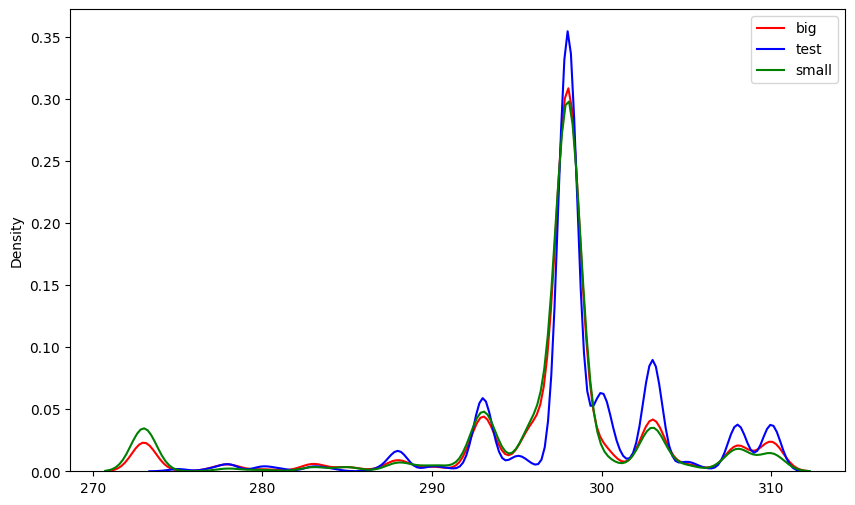

In [35]:
plt.figure(figsize=(10,6))
sns.kdeplot(temperatures[0], color="r", label="big", shade=False, bw_method=0.1)
sns.kdeplot(temperatures[1], color="b", label="test", shade=False, bw_method=0.1)
sns.kdeplot(temperatures[2], color="g", label="small", shade=False, bw_method=0.1)
plt.legend()
#plt.savefig("../../Drafts/Project-Thesis/img/Temperature_Distribution.png")

In [24]:
max(temperatures[2]) - min(temperatures[2])

37.0

## The following figure is prefered

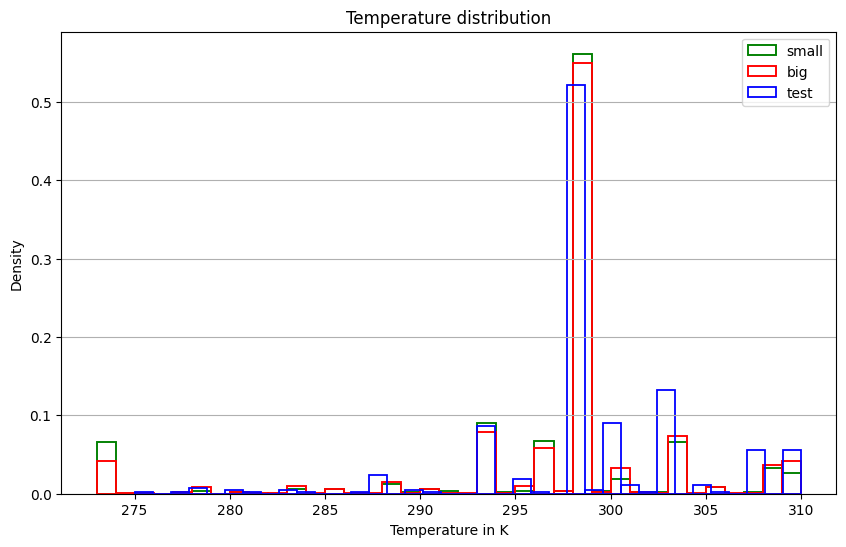

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(temperatures[2], color="g", label="small", bins=37, stat="density", fill=False)
sns.histplot(temperatures[0], color="r", label="big", bins=37, stat="density", fill=False)
sns.histplot(temperatures[1], color="b", label="test", bins=37, stat="density", fill=False)
plt.legend()
plt.xlabel("Temperature in K")
plt.title("Temperature distribution")
plt.grid(axis="y")
plt.savefig("../../Drafts/Project-Thesis/img/Temperature_Distribution.jpg")

### pH plot

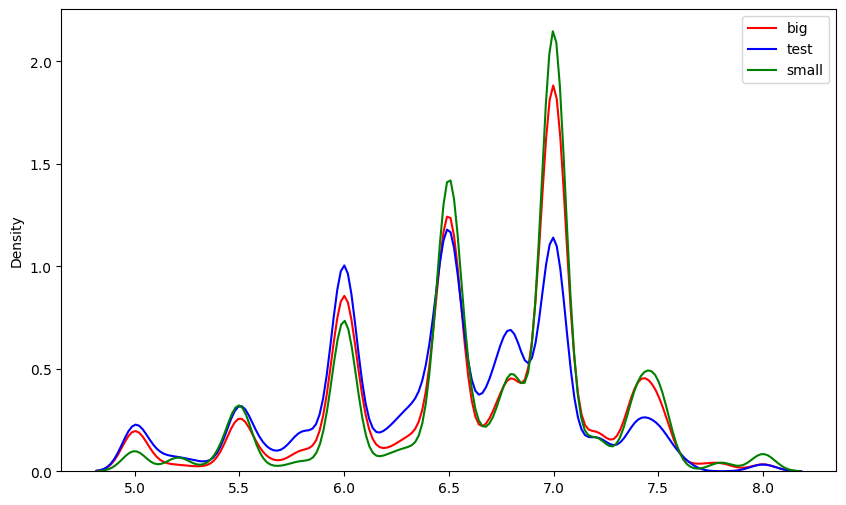

In [40]:
plt.figure(figsize=(10,6))
sns.kdeplot(pHs[0], color="r", label="big", shade=False, bw_method=0.1)
sns.kdeplot(pHs[1], color="b", label="test", shade=False, bw_method=0.1)
sns.kdeplot(pHs[2], color="g", label="small", shade=False, bw_method=0.1)
plt.legend()
#plt.savefig("../../Drafts/Project-Thesis/img/PH_Distribution.png")

## The following is the better plot

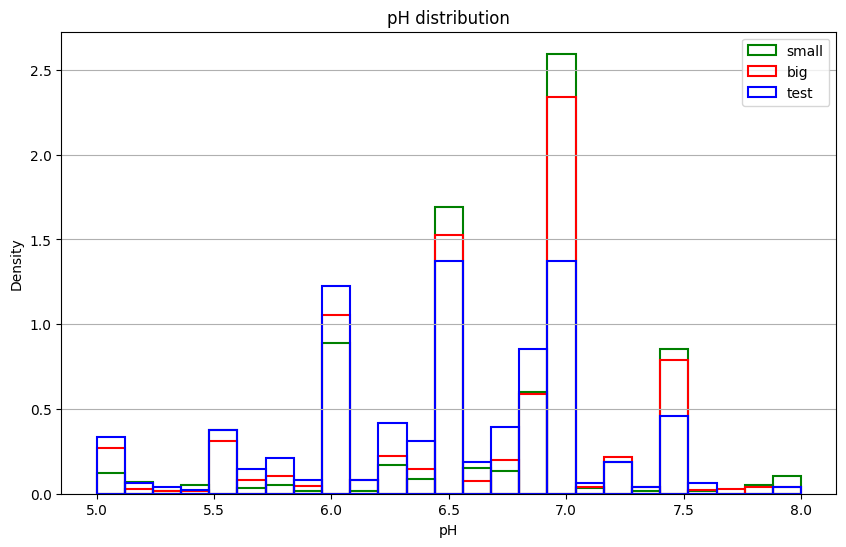

In [71]:
sns.color_palette("pastel")
plt.figure(figsize=(10,6))
sns.histplot(pHs[2], color="g", label="small", stat="density", bins=25, fill=False)
sns.histplot(pHs[0], color="r", label="big", stat="density", bins=25, fill=False)
sns.histplot(pHs[1], color="b", label="test", stat="density", bins=25, fill=False)
plt.legend()
plt.xlabel("pH")
plt.title("pH distribution")
plt.grid(axis="y")
plt.savefig("../../Drafts/Project-Thesis/img/PH_Distribution.jpg")